In [1]:
# Considere un puesto de venta de helados en la playa donde atiende una persona.
# Los clientes llegan según un Proceso de Renovación donde los tiempos entre
# eventos corresponden a una v.a. uniforme entre 4 y 6 minutos, y las atenciones
# toman un tiempo que corresponde a una v.a. exponencial con una media de 4
# minutos. El sistema tiene una Capacidadacidad de 6 personas (es decir, si la cola
# tiene 5 personas, los clientes no ingresan al sistema).

import numpy as np

In [52]:
!pip install ciw

In [2]:


def ExponentialInstance(lambd):
    u = np.random.uniform(0, 1)
    return -np.log(1 - u) / lambd
    
def UniformInstance(a, b):
    u = np.random.uniform(0, 1)
    return (b - a) * u + a
   


In [4]:
a = 4.0  # parámetro de la uniforme
b = 6.0   # parámetro de la uniforme
lambd = 1.0/4.0   # parámetro de la exponencial
T = 0.0   # Reloj
Tfin = 8*60  # Tiempo de la simulación
NClientesAtendidos = 0.0   # Número de clientes atendido
NClientesPerdidos = 0.0   # Número de clientes perdidos
LargoCola = 0   # clientes en la cola
Capacidad = 6   # Capacidad total del sistema
EstadoHeladero = 0   # vale 1 si el heladero esta atendiendo a alguien
TiempoProxLlegada = UniformInstance(a, b)   # Tiempo de llegada del próximo cliente
TiempoProxSalida = np.inf   # Tiempo de salida del cliente que esta siendo atendido
TiempoTotalPermanencia = 0.0   # Tiempo total de permanencia en el sistema de los clientes que fueron atendidos
TiemposLLegada = np.zeros(Capacidad)   # Tiempos de llegada de los clientes en la cola
TiempoPermanenciaMaximo = 0.0   # Tiempo máximo de un cliente en el sistema
TiempoTotalSistemaVacio = 0.0   # Cantidad de tiempo del sistema vacio

In [5]:
while (T < Tfin):
    print('\nT:',T)
    print('Largo de la cola:', LargoCola)
    print('Estado Heladero:', EstadoHeladero)
    if TiempoProxLlegada < TiempoProxSalida:
        #print (LargoCola)
        if LargoCola < Capacidad - 1:
            if EstadoHeladero == 0:
                EstadoHeladero = 1
                TiempoTotalSistemaVacio += (TiempoProxLlegada - T)
                T = TiempoProxLlegada
                TiempoProxLlegada = T + UniformInstance(a, b)
                TiempoProxSalida = (T + ExponentialInstance(lambd))
                TiemposLLegada[0] = T
            else:
                T = TiempoProxLlegada
                TiempoProxLlegada = T + UniformInstance(a, b)
                LargoCola += 1
                TiemposLLegada[LargoCola] = T
        else:
            NClientesPerdidos += 1.0
            T = TiempoProxLlegada
            TiempoProxLlegada = T + UniformInstance(a, b)
    else:
        T = TiempoProxSalida
        NClientesAtendidos += 1.0
        TiempoTotalPermanencia += (T - TiemposLLegada[0])
        TiempoPermanenciaMaximo = max(TiempoPermanenciaMaximo, (T - TiemposLLegada[0]))
        if LargoCola > 0:
            LargoCola -= 1
            TiempoProxSalida = T + ExponentialInstance(lambd)
            for i in range(len(TiemposLLegada) - 1):
                TiemposLLegada[i] = TiemposLLegada[i+1]
            TiemposLLegada[len(TiemposLLegada) - 1] = 0.0
        else:
            EstadoHeladero = 0
            TiempoProxSalida = np.inf




T: 0.0
Largo de la cola: 0
Estado Heladero: 0

T: 4.858058724086474
Largo de la cola: 0
Estado Heladero: 1

T: 10.711597150248604
Largo de la cola: 1
Estado Heladero: 1

T: 11.340524194832687
Largo de la cola: 0
Estado Heladero: 1

T: 12.474561170472798
Largo de la cola: 0
Estado Heladero: 0

T: 15.68683258112237
Largo de la cola: 0
Estado Heladero: 1

T: 20.372600617607397
Largo de la cola: 1
Estado Heladero: 1

T: 20.50262330251277
Largo de la cola: 0
Estado Heladero: 1

T: 25.564553269883163
Largo de la cola: 0
Estado Heladero: 0

T: 25.77300055160876
Largo de la cola: 0
Estado Heladero: 1

T: 26.24867630103952
Largo de la cola: 0
Estado Heladero: 0

T: 30.897021860706445
Largo de la cola: 0
Estado Heladero: 1

T: 31.068264095391502
Largo de la cola: 0
Estado Heladero: 0

T: 36.45967811678572
Largo de la cola: 0
Estado Heladero: 1

T: 41.45922995438196
Largo de la cola: 0
Estado Heladero: 0

T: 41.64581724258315
Largo de la cola: 0
Estado Heladero: 1

T: 44.82884036903271
Largo de 

In [56]:
print ("")
print ("Simulation parameters: lambda = ", lambd, ", uniforme(", a, ",", b , "), Capacity = ", Capacidad)
print ("\nRESULTADOS:")
print ("Served clientes: ", NClientesAtendidos)
print ("Average time of clients in the system: ", TiempoTotalPermanencia/NClientesAtendidos)
print ("Longest time in the system of a client: ", TiempoPermanenciaMaximo)
print ("Estimation of the probability that the system is empty in the long-term: ", TiempoTotalSistemaVacio/Tfin )
print ("Estimation of the propotion of unserved demand: ", NClientesPerdidos / (NClientesAtendidos + NClientesPerdidos))


Simulation parameters: lambda =  0.25 , uniforme( 4.0 , 6.0 ), Capacity =  6

RESULTADOS:
Served clientes:  94.0
Average time of clients in the system:  8.578659111723866
Longest time in the system of a client:  22.342250461553206
Estimation of the probability that the system is empty in the long-term:  0.1907009590976033
Estimation of the propotion of unserved demand:  0.0


In [8]:
import ciw

In [ ]:
N=ciw.create_a_networ(Arrival_distributions=[['Exponential':]])

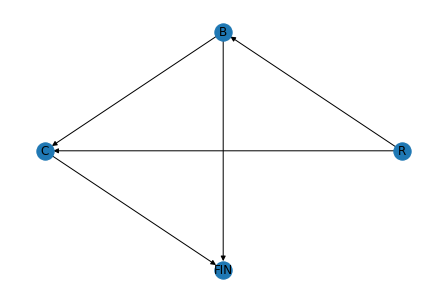

['R', 'B', 'FIN']


In [39]:
import networkx as nx
import pylab
G = nx.DiGraph(directed=True)
e = [('R', 'B', 0.3), ('B', 'C', 0.9), ('R', 'C', 0.5), ('C', 'FIN', 1.2),('B','FIN',0.1)]
G.add_weighted_edges_from(e)
nx.draw_shell(G, with_labels=True)
pylab.show()
print(nx.astar_path(G, 'R', 'FIN'))


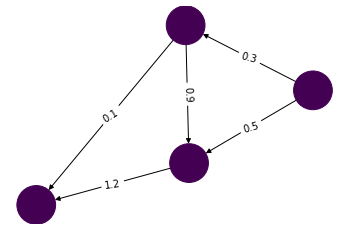

In [40]:
val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

edge_colors = ['black' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()